<h2><b>Предподготовка данных

<h3>Загрузка данных и удаление пустых строк из прогнозируемой величины

In [130]:
target_feature = 'iAUC120'
cat_features = ['meal_type_n', 'daytime', 'part_of_day', 'диета_до_1визита', 'отеки1', 'образование', 'menses', 'АГ', 'НТГ', 'гсд_анамнез', 'СПКЯ', 'СД_у_родственников', 'пролактин', 'КОК',
                'курение_до_беременности', 'курение_во_время', 'фрукты1', 'пирожные1', 'выпечка1', 'шоколад1', 'молочное_обезжир1', 'молочное_необезжир1', 'бобовые1', 'мясо1', 'сухофрукты1',
                'рыба1', 'хлеб_цельное1', 'хлеб_любой1', 'соусы1','овощи1', 'овощи1_сырые', 'алкоголь1', 'сладкие_напитки1', 'кофе1', 'сосиски1', 'фрукты2', 'пирожные2', 'выпечка2', 'шоколад2',
                'молочное_обезжир2', 'молочное_необезжир2', 'бобовые2', 'мясо2', 'сухофрукы2', 'рыба2', 'хлеб_цельнозерновой_2', 'хлеб_любой2', 'соусы2','овощи2', 'овощи2_сырые', 'алкоголь2', 'сладкие_напитки2',
                'кофе2', 'сосиски2', 'ходьба1', 'подъем1', 'спорт1', 'ходьба2', 'подъем2', 'спорт2']

In [131]:
import numpy as np
import pandas as pd

data = pd.read_csv('data.csv', delimiter=';', index_col=1)

data = data.drop(columns=['meal_id', 'n_cgm', 'CGM_range', 'CGM_mean', 'CGM_below', 'CGM_above', 'BGb60_to_mean', 'quality_diary_x', 'срок_берем1', 'через1час_тест', 'через2часа_тест', 'Run'])
data.dropna(subset=target_feature, axis=0, inplace=True)

data[cat_features] = data[cat_features].astype('str')

<h3> Убираем дисбаланс

In [132]:
N = np.unique(data.index)
N_count_strip = list(filter(lambda n: len(data.loc[n]) >  29, N))
stripped_data = pd.DataFrame()
for n in N_count_strip:
    stripped_data = pd.concat([stripped_data, data.loc[n].sample(n=30, random_state=1)])

<h3>Набор данных с микробиомом

In [133]:
stripped_data = stripped_data.sample(frac=1, random_state=1, replace=False)
stripped_data.head(10)

,preg_week,meal_type_n,gi,gl,carbo,prot,fat,kcal,water,mds,...,инсулин_V1,лептин_V1,ФР_V1,БОМК_визит1,Хол_V1,ТГ_V1,ЛПВП_V1,ЛПОНП_V1,ЛПНП_V1,КА_V1
N,,,,,,,,,,,,,,,,,,,,,
363,34.0,1,45.5,22.4,49.2,37.3,21.3,554.6,431.80,48.24,...,130.70,34.26,216.00,0.094,6.07,1.97,2.14,0.903670,3.026330,1.836449
836,34.0,4,58.7,37.7,64.2,5.4,4.5,270.8,256.36,58.58,...,88.65,36.65,222.00,0.106,4.17,0.98,1.88,0.449541,1.840459,1.218085
591,32.0,4,37.4,8.5,22.7,1.9,0.7,116.5,227.86,22.06,...,41.34,18.98,216.00,0.088,6.01,1.54,2.04,0.706422,3.263578,1.946078
480,31.0,4,72.9,16.1,22.2,22.0,21.9,387.0,446.10,8.23,...,77.70,12.77,179.00,0.036,5.15,2.17,1.50,0.995413,2.654587,2.433333
446,32.0,4,70.0,11.1,15.9,12.0,12.3,226.0,33.04,2.04,...,94.70,43.60,199.00,0.197,6.98,2.09,2.36,0.958716,3.661284,1.957627
414,29.0,4,68.3,16.7,24.5,15.4,20.8,356.6,320.54,24.14,...,39.07,8.68,207.00,0.068,5.76,1.16,2.08,0.532110,3.147890,1.769231
847,23.0,1,NaN,NaN,27.4,9.1,12.8,272.2,200.69,13.37,...,76.60,10.66,213.00,0.087,5.58,2.26,1.97,1.036697,2.573303,1.832487
363,34.0,2,46.1,8.4,18.2,18.5,30.2,421.4,165.84,4.64,...,130.70,34.26,216.00,0.094,6.07,1.97,2.14,0.903670,3.026330,1.836449
289,31.0,4,39.0,14.7,37.8,1.5,1.5,181.4,333.12,34.74,...,34.80,7.62,190.10,0.204,6.46,1.80,2.02,0.825688,3.614312,2.198020


<h3>Набор данных без бикробиома

In [134]:
clinical_data = stripped_data.drop(list(stripped_data.filter(regex=';')), axis=1, inplace=False)
clinical_data.head(10)

,preg_week,meal_type_n,gi,gl,carbo,prot,fat,kcal,water,mds,...,инсулин_V1,лептин_V1,ФР_V1,БОМК_визит1,Хол_V1,ТГ_V1,ЛПВП_V1,ЛПОНП_V1,ЛПНП_V1,КА_V1
N,,,,,,,,,,,,,,,,,,,,,
363,34.0,1,45.5,22.4,49.2,37.3,21.3,554.6,431.80,48.24,...,130.70,34.26,216.00,0.094,6.07,1.97,2.14,0.903670,3.026330,1.836449
836,34.0,4,58.7,37.7,64.2,5.4,4.5,270.8,256.36,58.58,...,88.65,36.65,222.00,0.106,4.17,0.98,1.88,0.449541,1.840459,1.218085
591,32.0,4,37.4,8.5,22.7,1.9,0.7,116.5,227.86,22.06,...,41.34,18.98,216.00,0.088,6.01,1.54,2.04,0.706422,3.263578,1.946078
480,31.0,4,72.9,16.1,22.2,22.0,21.9,387.0,446.10,8.23,...,77.70,12.77,179.00,0.036,5.15,2.17,1.50,0.995413,2.654587,2.433333
446,32.0,4,70.0,11.1,15.9,12.0,12.3,226.0,33.04,2.04,...,94.70,43.60,199.00,0.197,6.98,2.09,2.36,0.958716,3.661284,1.957627
414,29.0,4,68.3,16.7,24.5,15.4,20.8,356.6,320.54,24.14,...,39.07,8.68,207.00,0.068,5.76,1.16,2.08,0.532110,3.147890,1.769231
847,23.0,1,NaN,NaN,27.4,9.1,12.8,272.2,200.69,13.37,...,76.60,10.66,213.00,0.087,5.58,2.26,1.97,1.036697,2.573303,1.832487
363,34.0,2,46.1,8.4,18.2,18.5,30.2,421.4,165.84,4.64,...,130.70,34.26,216.00,0.094,6.07,1.97,2.14,0.903670,3.026330,1.836449
289,31.0,4,39.0,14.7,37.8,1.5,1.5,181.4,333.12,34.74,...,34.80,7.62,190.10,0.204,6.46,1.80,2.02,0.825688,3.614312,2.198020


<h2><b>Обучение модели

<h3>Разбили на тестовую и обучающую выборки

In [135]:
from sklearn.model_selection import train_test_split

X_clinical = clinical_data.drop(columns=['BG30', 'BG60', 'BG90', 'BG120', 'BGMax', 'BGLag', 'BGRise', 'AUC60', 'AUC120', 'iAUC60', 'iAUC120'])
Y_clinical = clinical_data[target_feature]
N_train_clinical, N_test_clinical = train_test_split(np.unique(clinical_data.index), random_state=1)

In [136]:
def shuffled_split(X, Y, N_train, N_test):
    return X.loc[N_train].sample(frac=1, random_state=1, replace=False), Y.loc[N_train].sample(frac=1, random_state=1, replace=False), \
           X.loc[N_test].sample(frac=1, random_state=1, replace=False), Y.loc[N_test].sample(frac=1, random_state=1, replace=False)

In [137]:
X_train_clinical, Y_train_clinical, X_test_clinical, Y_test_clinical = shuffled_split(X_clinical, Y_clinical, N_train_clinical, N_test_clinical)

In [138]:
print('Номера (N) пациентов из таблицы данных без микробиома\n')
print(f'Тренировочная выборка: {N_train_clinical}\n')
print(f'Тестовая выборка: {N_test_clinical}')

Номера (N) пациентов из таблицы данных без микробиома

Тренировочная выборка: [696 591 827 414 718 832 310 291 828 337 581 346 847 289 610 281 602 857
 856 395 363 480 446 328]

Тестовая выборка: [835 292 803 617 808 613 791 836]


<h3>Поиск параметров модели по сетке

In [ ]:
from catboost import CatBoostRegressor, Pool

model = CatBoostRegressor(random_seed=1, verbose=False)
grid = {'iterations': [150, 250, 350],
              'learning_rate': [.1, .07, .03],
              'depth': [4, 6, 8],
              'l2_leaf_reg': [0, 1, 2]
              }
grid_search_result = model.grid_search(grid, X = Pool(X_train_clinical, Y_train_clinical, cat_features = cat_features))

In [150]:
grid_search_result['params']

{'depth': 6, 'l2_leaf_reg': 0, 'iterations': 150, 'learning_rate': 0.07}

<h3> Прогнозирование на тестовой выборке

In [140]:
train_clinical_pool = Pool(X_train_clinical, Y_train_clinical, cat_features = cat_features)
test_clinical_pool = Pool(X_test_clinical, cat_features = cat_features)

model.fit(train_clinical_pool)
Y_pred_clinical = model.predict(test_clinical_pool)

<h3>Расчет статистики

In [141]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from scipy import stats

r = stats.pearsonr(Y_pred_clinical, Y_test_clinical)
print(f"R : {round(r[0],2)}, p-value={round(r[1],2)}")
print("R^2 : ", round(r2_score(Y_test_clinical, Y_pred_clinical),2))
print("MAE : ", round(mean_absolute_error(Y_test_clinical, Y_pred_clinical),2))
print("RMSE: ", round(np.sqrt(mean_squared_error(Y_test_clinical, Y_pred_clinical)),2))
print(f'Тренировочная выборка: {X_train_clinical.shape[0]} записей / {len(np.unique(X_train_clinical.index))} \
пациентов\nТестовая выборка: {X_test_clinical.shape[0]} запсией / {len(np.unique(X_test_clinical.index))} пациентов')

R : 0.63, p-value=0.0
R^2 :  0.35
MAE :  0.42
RMSE:  0.65
Тренировочная выборка: 720 записей / 24 пациентов
Тестовая выборка: 240 запсией / 8 пациентов


<h3>Графики

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


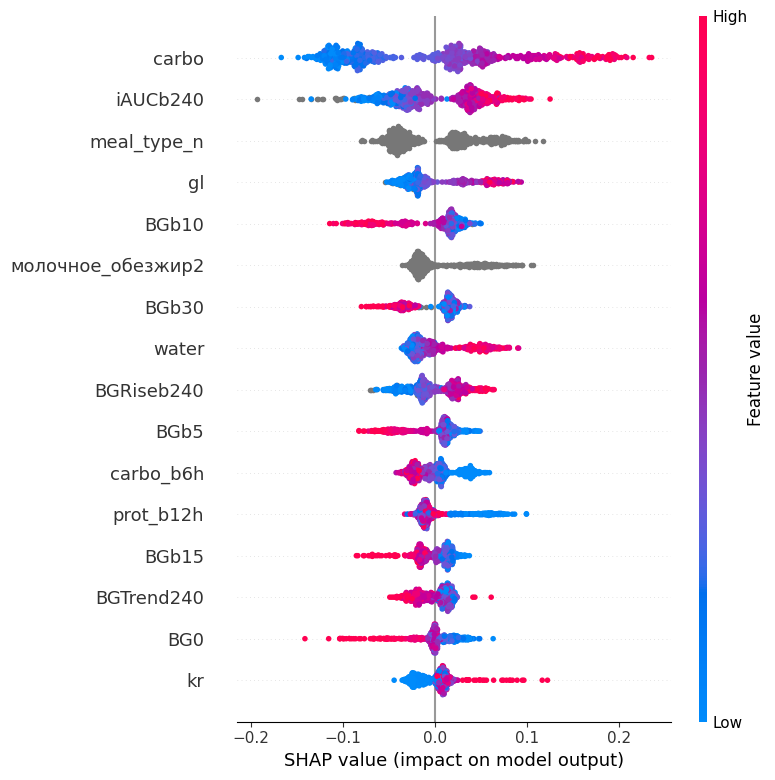

In [142]:
import shap

explainer = shap.TreeExplainer(model)
shap_values=explainer.shap_values(train_clinical_pool)
shap.summary_plot(shap_values, X_train_clinical, max_display=round(X_train_clinical.shape[1]*0.1))

<h3>Повтор шагов для данных с добавлением микробиома

In [143]:
X_micr = stripped_data.drop(columns=['BG30', 'BG60', 'BG90', 'BG120', 'BGMax', 'BGLag', 'BGRise', 'AUC60', 'AUC120', 'iAUC60', 'iAUC120'])
Y_micr = stripped_data[target_feature]
N_train_micr, N_test_micr = train_test_split(np.unique(stripped_data.index), random_state=1)

In [144]:
X_train_micr, Y_train_micr, X_test_micr, Y_test_micr = shuffled_split(X_micr, Y_micr, N_train_micr, N_test_micr)

In [145]:
print('Номера (N) пациентов из таблицы данных c микробиомом\n')
print(f'Тренировочная выборка: {N_train_micr}\n')
print(f'Тестовая выборка: {N_test_micr}')

Номера (N) пациентов из таблицы данных c микробиомом

Тренировочная выборка: [696 591 827 414 718 832 310 291 828 337 581 346 847 289 610 281 602 857
 856 395 363 480 446 328]

Тестовая выборка: [835 292 803 617 808 613 791 836]


In [146]:
train_micr_pool = Pool(X_train_micr, Y_train_micr, cat_features = cat_features)
test_micr_pool = Pool(X_test_micr, cat_features = cat_features)

model.fit(train_micr_pool)
Y_pred_micr = model.predict(test_micr_pool)

In [147]:
r = stats.pearsonr(Y_test_micr, Y_pred_micr)
print(f"R : {round(r[0],2)}, p-value={round(r[1],2)}")
print("R^2 : ", round(r2_score(Y_test_micr, Y_pred_micr),2))
print("MAE : ", round(mean_absolute_error(Y_test_micr, Y_pred_micr),2))
print("RMSE: ", round(np.sqrt(mean_squared_error(Y_test_micr, Y_pred_micr)),2))
print(f'Тренировочная выборка: {X_train_micr.shape[0]} записей / {len(np.unique(X_train_micr.index))} \
пациентов\nТестовая выборка: {X_test_micr.shape[0]} запсией / {len(np.unique(X_test_micr.index))} пациентов')

R : 0.65, p-value=0.0
R^2 :  0.37
MAE :  0.42
RMSE:  0.64
Тренировочная выборка: 720 записей / 24 пациентов
Тестовая выборка: 240 запсией / 8 пациентов


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


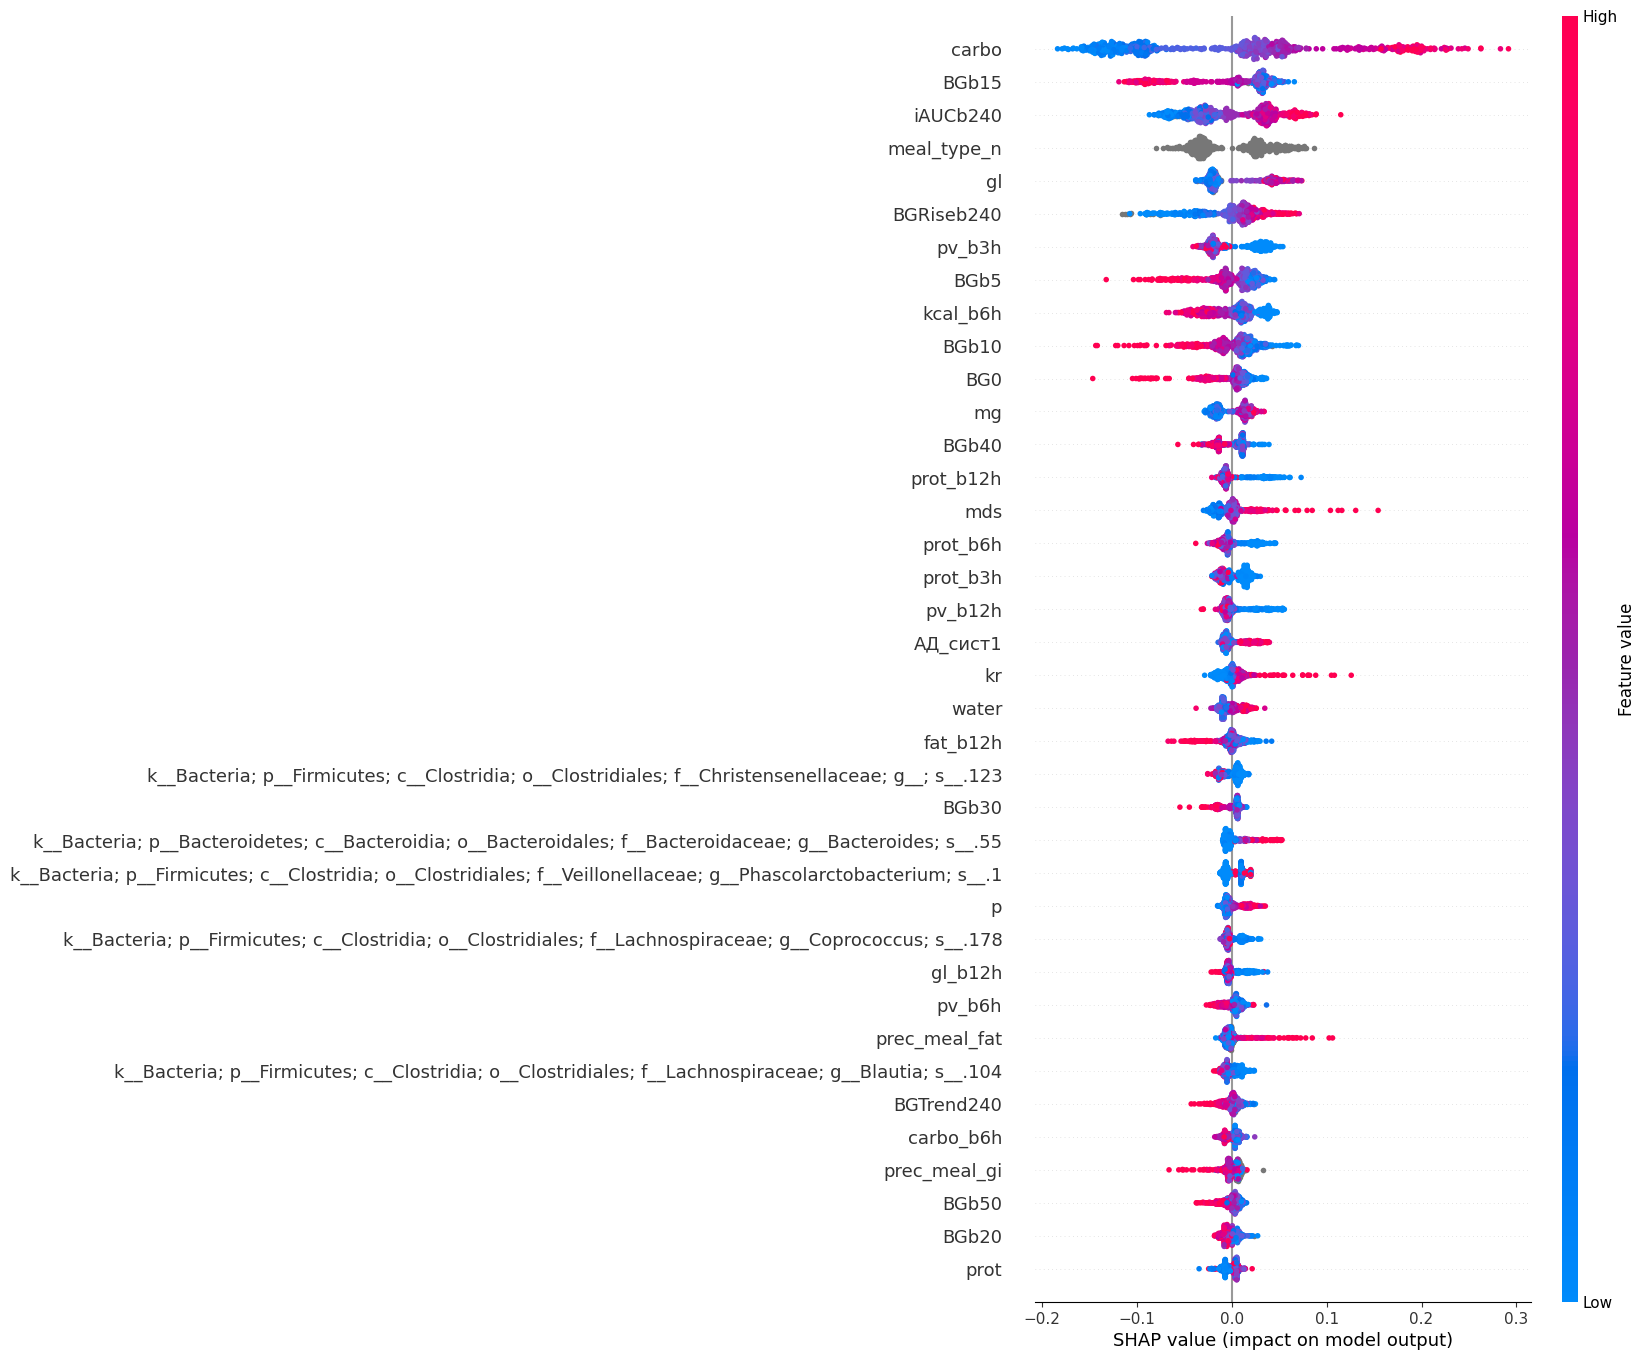

In [148]:
import shap

explainer = shap.TreeExplainer(model)
shap_values=explainer.shap_values(train_micr_pool)
shap.summary_plot(shap_values, X_train_micr, max_display=round(X_train_micr.shape[1]*0.1))